In [7]:
!python --version

Python 3.8.13


C:\Users\ANUPAM\AppData\Local\Temp\ipykernel_15624\682082795.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Enter Particle Strength in Integers =  10
Enter the No of dimensions Required =  3
Enter the No of Iterations Required =  20
Enter the value of crossover rate between 0 to 1 =  0.5
Enter the value of F between 0 & 1 =  0.8



 Initial Target Vector
 [[ 7.79752283 -0.15326992 -3.22841706]
 [ 0.04394027  1.47251488  5.61453725]
 [-8.16154278 -4.06757055  5.09992434]
 [ 4.86869649  3.25649052  6.94967662]
 [-2.88147987 -7.8083012   3.42763119]
 [-6.22070154 -5.27195086  7.83131525]
 [ 9.84545214  6.90833228  2.04947516]
 [ 5.92661814 -5.68156888  9.05731387]
 [ 9.24008835  7.4639025   4.87831368]
 [ 7.09903407  2.87640447 -2.92035343]]

Iteration No : 0

Fitness Function Results for Target Vector [7.95, 1.52, 12.23, 8.13, 10.69, 11.49, 16.75, 11.61, 16.7, 9.98]

Iteration No : 1

Fitness Function Results for Target Vector [0.17, 1.52, 12.23, 8.13, 10.69, 11.49, 16.75, 11.61, 13.32, 9.98]

Iteration No : 2

Fitness Function Results for Target Vector [0.17, 1.52, 9.35, 7.28, 4.07, 9.46, 16.75, 11.61, 1.33, 9.98]

Iteration No : 3

Fitness Function Results for Target Vector [0.17, 1.52, 6.15, 6.63, 4.07, 9.46, 16.75, 8.56, 1.33, 8.7]

Iteration No : 4

Fitness Function Results for Target Vector [0.17, 1.52, 6.15

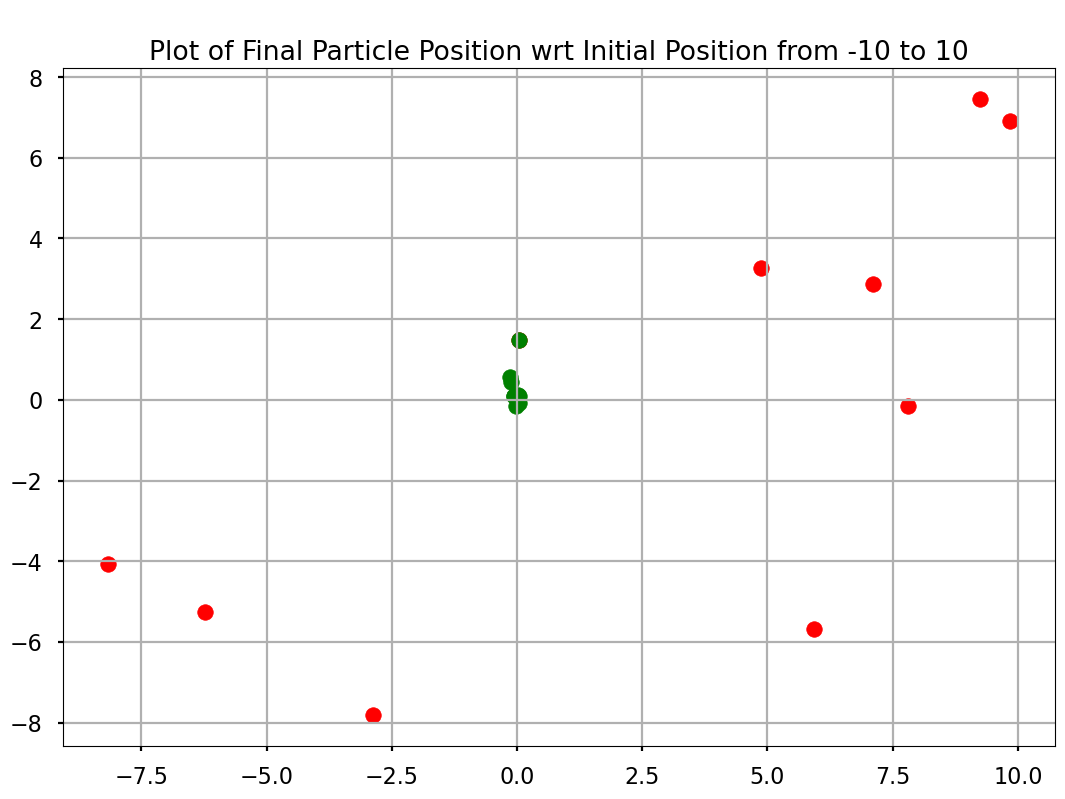

In [8]:
# Libraries
from __future__ import division
import numpy  as np
import math
import random
from numpy.random import rand
from numpy.random import choice
import os
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d
plt.style.use('seaborn-poster')
#%matplotlib notebook

# Fitness Function f(x1,x2) = abs(x1) + abs(x2) s.t -10 <= x1,x2 <=10
def func(x1,x2):
    fx = abs(x1)+abs(x2)
    return(fx)
       
# Mutant Vector - DE/rand/1/bin strategy
def mutant(X, F):
    V = []
    for i in range(S):
        #V = []
        for j in range(S):
            if(i!=j):
                original_list = X
                # k = number of items to select
                sample_list = random.choices(original_list, k=3)
                a = sample_list[0]
                b = sample_list[1]
                c = sample_list[2]
                #print(sample_list)
                mut = a + F*(b - c)
                #print(mut)
        V.append(mut)
        #print(V)
    #V.append
    return(V)

# Trial Vector
def trial(X, V, cr, S):
    U = []; i=j=0;
    #print(X)
    #print(V)
    for i in range(S):
        col = []
        for j in range(d):
            a = random.random()
            #print(a)
            if(a <= cr):
                col.append(V[i][j])
            else:
                col.append(X[i][j])
        U.append(col)
    return(U)
    
# Iterations & Parameters

S = int(input("Enter Particle Strength in Integers = "))  # Input Particle Strength
d = int(input("Enter the No of dimensions Required = ")) # Input dimension size
N = int(input("Enter the No of Iterations Required = ")) # Input No of Iterations
cr = float(input("Enter the value of crossover rate between 0 to 1 = ")) # Input cr value
F = float(input("Enter the value of F between 0 & 1 = ")) # Input value of F

lb = -10
ub = 10

# Target Vector with S targets and d dimensions
X = []
for i in range(S):
    col = []
    for j in range(d):
        col.append(random.uniform(lb,ub))
    X.append(col)
X = np.array(X)
X = X.reshape(S,d)
print("\n Initial Target Vector\n", X)

I = X # Initial Values retained

# Start of Iterations, N
for n in range(N):
    print("\nIteration No :", n)
    # Differntial Evolution : Target Vector,X; Mutant Vector,V; Trial Vector,U; Fitness Functions - fx1 and fx2
    fx1 = []
    for i in range(S):
        fx1.append(round((func(X[i][0],X[i][1])),2))
    print("\nFitness Function Results for Target Vector", fx1)

    V = []
    for i in range(S):
        V = mutant(X, F)
        V.append
    V = np.array(V)
    V = V.reshape(S,d)
    #print("\nMutant Vector\n", V)    

    U = []
    U = trial(X, V, cr, S)
    U = np.array(U)
    U = U.reshape(S,d)
    #print("\nTrial Vector\n", U)

    fx2 = []
    for i in range(S):
        fx2.append(round((func(U[i][0],U[i][1])),2))
    #print("\nFitness Function Results for Trial Vector", fx2)

    # Next Generation, Y
    Y = []
    for i in range(S):
        if(fx1[i] < fx2[i]):
            Y.append(X[i])
        else:
            Y.append(U[i])
    
    Y = np.array(Y)
    Y = Y.reshape(S,d)
    #print("\nNext Generation\n", Y)
    
    # Assigning X = Y and starting next iteration
    X = Y

n+=1

# Plotting Final Result with Initial Position
fig, ax= plt.subplots()
for i in range(S):
    plt.scatter(I[i][0], I[i][1], c ='r')
    plt.scatter(Y[i][0], Y[i][1], c ='g')

plt.title(f'\nPlot of Final Particle Position wrt Initial Position from {lb} to {ub}')
plt.grid()
plt.show()


C:\Users\ANUPAM\anaconda3\envs\prac\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


ValueError: need at least one array to concatenate

<Figure size 1280x880 with 1 Axes>

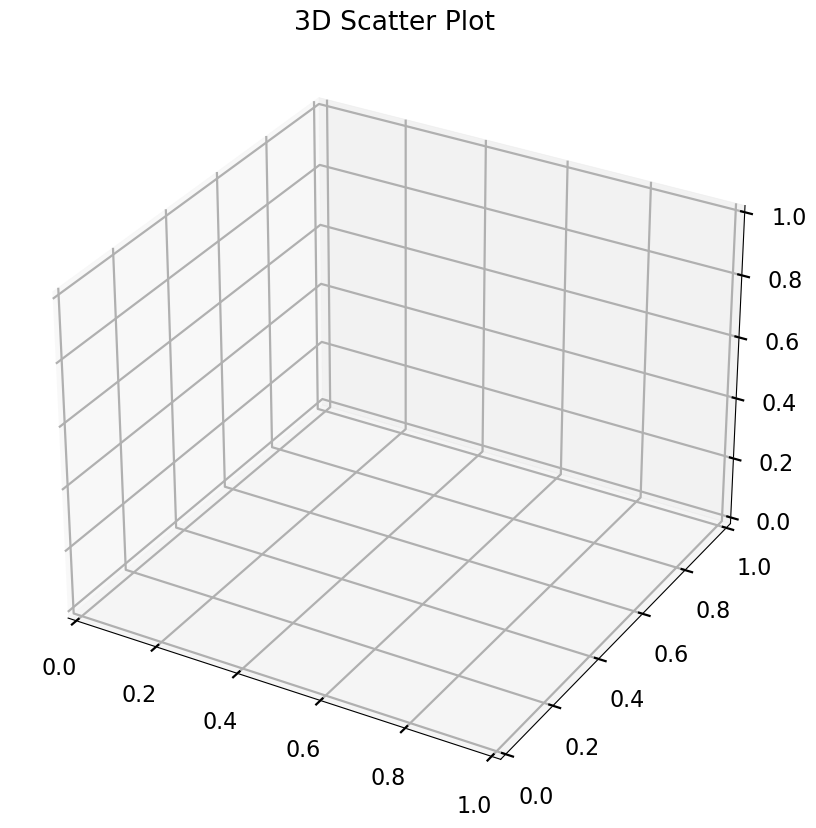

In [9]:
for i in range(S):
    plt.scatter(I[i][0], I[i][1], I[i][2], c ='r')
    plt.scatter(Y[i][0], Y[i][1], Y[i][2], c ='g')

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()


#ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('3D Scatter Plot')

# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

plt.show()